## 1. Cross-validation linear regression

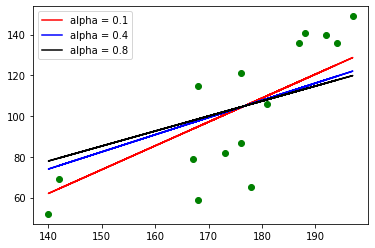

In [79]:
import matplotlib.pyplot as plt
import numpy as np

weights = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
heights = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)

y = weights
x = np.asmatrix(np.c_[np.ones((15,1)),heights])

I = np.identity(2)
alpha = [0.1, 0.4, 0.8] # change here

results = []
for a in alpha:
    w = np.linalg.inv(x.T*x + a * I)*x.T*y
    w=w.ravel()
    results.append(w)

# add 1-3 lines to compare the results
def reg_predict(inputs, w, b):
    results = []
    for inp in inputs:
        results.append(inp*w+b)
    return results

plt.scatter(heights.flatten(), weights.flatten(),color='g')
plt.plot(heights.flatten(), reg_predict(heights.flatten(), results[0].item(1), results[0].item(0)) ,label='alpha = 0.1',color='red')
plt.plot(heights.flatten(), reg_predict(heights.flatten(), results[1].item(1), results[1].item(0)) ,label='alpha = 0.4',color='blue')
plt.plot(heights.flatten(), reg_predict(heights.flatten(), results[2].item(1), results[2].item(0)) ,label='alpha = 0.8',color='black')
plt.legend(loc='best')
plt.show()

## 2. Implement based on the Ridge regression example, the Lasso regression.

In [102]:
def sgd(coeffs, x, y, epochs, rate, l1):
    norm = np.linalg.norm(x, axis = 0)
    w, b, m, n = coeffs[0], coeffs[1], y.shape[0], x.shape[1]
    for i in range(epochs):
        x_in = x[:,1].reshape(-1, 1)
        y_pred = x_in * w + b
        if w > 0:
            dW = (- (2 * x_in.T.dot(y - y_pred)) + l1 ) / norm[1] ** 2
        else:
            dW = (- (2 * x_in.T.dot(y - y_pred)) - l1 ) / norm[1] ** 2
        db = - 2 * np.sum(y - y_pred) // norm[0] ** 2
        w = w - rate * dW
        b = b - rate * db
    coeffs[0] = b
    coeffs[1] = w
    return coeffs

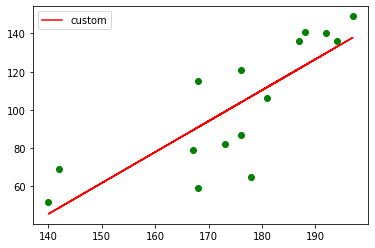

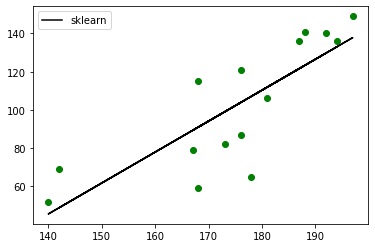

In [106]:
from sklearn.linear_model import Lasso

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 

init_c = np.zeros((2,1))
results = []

w2 = sgd(init_c, x, y, 1600, 0.1, alpha)
w2 = w2.ravel()
results.append(w2)

w1 = np.linalg.inv(x.T * x + alpha * I) * x.T * y
w1 = w1.ravel()
w1 = np.squeeze(np.asarray(w1))
results.append(w1)

#sklearn
heights1 = np.asmatrix(np.c_[np.ones((15,1)), heights])

lasso_regression = Lasso(alpha=alpha)
lasso_regression.fit(X=heights, 
                      y=weights)
lasso_regression.coef_, lasso_regression.intercept_ 

#plot
plt.scatter(heights, weights,color='g')
plt.plot(heights.flatten(), reg_predict(heights.flatten(), w.item(1), w.item(0)) ,label='custom',color='red')
plt.legend(loc='best')
plt.show()

plt.scatter(heights, weights,color='g')
plt.plot(heights, lasso_regression.predict(heights), label='sklearn',color='k')
plt.legend(loc='best')
plt.show()

## 3. Extend the Fisher's classifier


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df[['sepal width (cm)', 'sepal length (cm)']].values # change here
y = pd.DataFrame(iris_data.target).values # change here

dataset_size = np.size(y)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x

y_pred = a * x + b